11
3036 3036 3036
(11, 276)
[ 0.03859155  0.08253521  0.12647887  0.17042254  0.2143662   0.25830986
  0.30225352  0.34619718  0.39014085  0.43408451  0.47802817  0.52197183
  0.56591549  0.60985915  0.65380282  0.69774648  0.74169014  0.7856338
  0.82957746  0.87352113  0.91746479  0.96140845  1.00535211  1.04929577
  1.09323944  1.1371831   1.18112676  1.22507042  1.26901408  1.31295775
  1.35690141  1.40084507  1.44478873  1.48873239  1.53267606  1.57661972
  1.62056338  1.66450704  1.7084507   1.75239437  1.79633803  1.84028169
  1.88422535  1.92816901  1.97211268  2.01605331  2.0562671   2.09260672
  2.12879244  2.1644782   2.19925491  2.23266086  2.26420506  2.29339416
  2.31975656  2.34286091  2.36232916  2.37784515  2.38916013  2.39609621
  2.39854845  2.39648601  2.38995254  2.3790658   2.36401633  2.34506472
  2.32253679  2.29681568  2.26832938  2.23753276  2.20488402  2.17081811
  2.13572374  2.09993325  2.06        2.01409532  1.96120856  1.90832181
  1.85543506  1.80254831

C:\Users\lydia\anaconda3\envs\ipopt_env\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
Exception ignored in: 'ipopt.cyipopt.jacobian_cb'
Traceback (most recent call last):
  File "C:\Users\lydia\PycharmProjects\PathPlanning\OBCAOneObsTimeOptimalPathPlanning.py", line 314, in OBCAOneObsTimeOptimalPathPlanning
    sol, info = nlp.solve(x0)
ValueError: setting an array element with a sequence.
Exception ignored in: 'ipopt.cyipopt.jacobian_cb'
Traceback (most recent call last):
  File "C:\Users\lydia\PycharmProjects\PathPlanning\OBCAOneObsTimeOptimalPathPlanning.py", line 314, in OBCAOneObsTimeOptimalPathPlanning
    sol, info = nlp.solve(x0)
ValueError: setting an array element with a sequence.
Exception ignored in: 'ipopt.cyipopt.jacobian_cb'
Traceback (most recent call last):
  File "C:\Users\lydia\PycharmProjects\PathPlanning\OBCAOn

ValueError: setting an array element with a sequence.

ValueError: setting an array element with a sequence.

ValueError: setting an array element with a sequence.

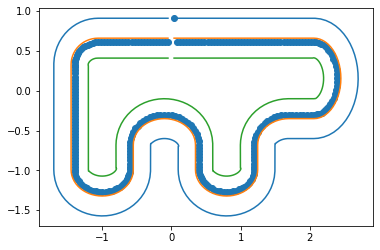

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import sparse
import scipy as sp
import numpy.matlib
import matplotlib.pyplot as plt
from OBCAOneObsTimeOptimalPathPlanning import OBCAOneObsTimeOptimalPathPlanning
from Obs import obstacleMatrices
from matplotlib.pyplot import scatter
track_ref = scipy.io.loadmat('track_b.mat')
# print(track_ref)
# inner=track_ref[0]
track2 = np.array(track_ref['track_b'])
track1=track2[0,0]
track_inner = track1[0]
track_outer = track1[1]
track_center = track1[2]
xPath = track_center[0]
yPath = track_center[1]
xCenter =track_center[0]
yCenter = track_center[1]
xInner = track_inner[0]
yInner = track_inner[1]
xOuter = track_outer[0]
yOuter = track_outer[1]
centerPoints = np.vstack([xCenter, yCenter])
innerPoints = np.vstack([xInner, yInner])
outerPoints = np.vstack([xOuter, yOuter])
innerPoints = np.vstack([xInner, yInner])
plt.plot(xCenter, yCenter)
plt.plot(xInner, yInner)
plt.plot(xOuter,yOuter)

starting_N_point=1
N= np.shape(centerPoints)[1]-1
ending_N_point = starting_N_point + N

warm = {}
warm['xWarm'] = centerPoints[0,starting_N_point-1:ending_N_point]
warm['yWarm'] = centerPoints[1,starting_N_point-1:ending_N_point]

xOuter = outerPoints[0,starting_N_point-1:ending_N_point]
yOuter = outerPoints[1,starting_N_point-1:ending_N_point]
xInner = innerPoints[0,starting_N_point-1:ending_N_point]
yInner = innerPoints[1,starting_N_point-1:ending_N_point]


safeMargin = 0.05
xInnerMargin = np.zeros((N+1,1))
yInnerMargin = np.zeros((N+1,1))
xOuterMargin = np.zeros((N+1,1))
yOuterMargin = np.zeros((N+1,1))

for i in range(N+1):
    b=np.hstack([xInner[i],yInner[i]])-np.hstack([xOuter[i],yOuter[i]])
    dist =  np.linalg.norm(b,2)
    t = safeMargin/dist
    xInnerMargin[i] = (1-t)*xInner[i] + t*xOuter[i]
    yInnerMargin[i]= (1-t)*yInner[i] + t*yOuter[i]
    xOuterMargin[i] = (1-t)*xOuter[i] + t*xInner[i]
    yOuterMargin[i] = (1-t)*yOuter[i] + t*yInner[i]

origin = np.vstack([-0.65, -0.98])
theta = 0
length = 0.1
width = 0.1
object = {}
[A, b] = obstacleMatrices(origin, theta, length, width)
object['A'] = A
object['b'] = b

dMin = 0.05;
initAngle = math.atan2(warm['yWarm'][1]-warm['yWarm'][0], warm['xWarm'][1]- warm['xWarm'][0])
initPoint = np.hstack([warm['xWarm'][0], warm['yWarm'][0], initAngle])

solution = OBCAOneObsTimeOptimalPathPlanning(xInnerMargin, yInnerMargin, xOuterMargin, yOuterMargin, warm, initPoint,object, dMin)
print(np.shape(solution))

xPath = solution[0, :]
yPath = solution[1, :]
print(xPath)
scatter(xPath, yPath)